In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [124]:
df = pd.read_csv('data/diabetes_data_Limbe.csv')
df.sample(5)

,Patient_ID,Age,Blood_Glucose_Level,BMI,Diabetes_Stage,Gender,Medication_Adherence,Physical_Activity_Level
625,626,31,108,30.109816,Basic,Female,Good,Moderately Active
2038,2039,66,187,25.827458,Basic,Male,Moderate,Moderately Active
993,994,20,155,24.528655,Terminal,Male,Good,Moderately Active
401,402,29,149,18.877989,Terminal,Male,Poor,Moderately Active
1282,1283,87,113,24.366680,Basic,Female,Poor,Moderately Active


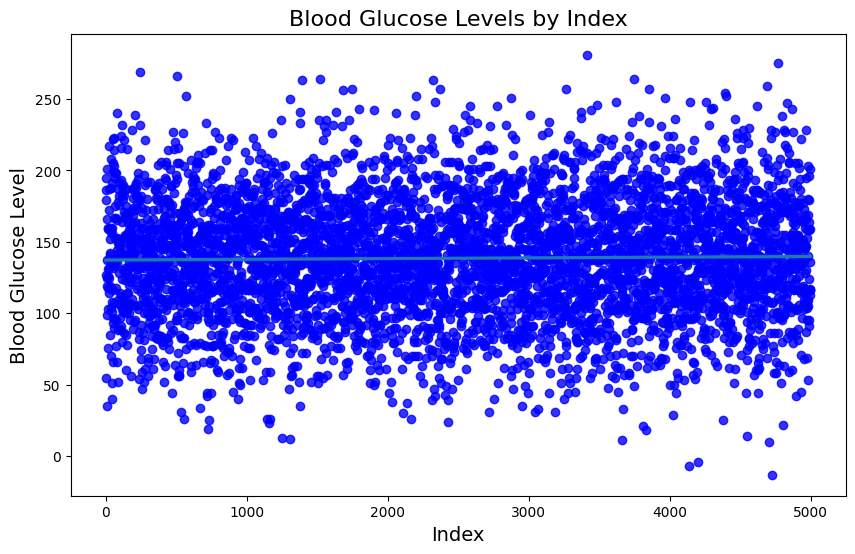

In [125]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df.index, y='Blood_Glucose_Level', data=df, scatter_kws={'color': 'blue'})
plt.title('Blood Glucose Levels by Index', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Blood Glucose Level', fontsize=14)
plt.show()

# Hypoglycemia (low spleen):

   # Danger: Blood_Glucose_Level < 70 mg/dL
# Hyperglycemia (high spleen):

   # Danger: Blood_Glucose_Level > 200 mg/dL

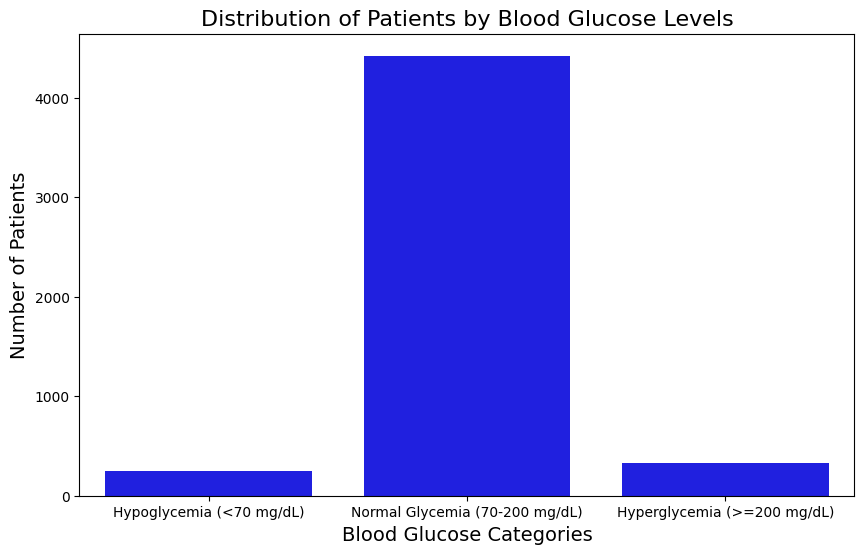

Number of patients who have 'Blood_Glucose_Level' below 70 mg/dL: 253
Number of patients who have 'Blood_Glucose_Level' greater than or equal to 200 mg/dL: 324
Number of patients who have 'Blood_Glucose_Level' between 70 and 200 mg/dL (normalglycemia): 4423


In [126]:
# Define age groups
young_patients = df[df['Age'] < 35]
senior_patients = df[df['Age'] >= 65]
Middle_Adulthood_patients = df[(df['Age'] >= 35)&(df['Age'] <65)]

# Count the number of patients with blood glucose level below 70 mg/dL (hypoglycemia)
hypoglycemia_count = (df['Blood_Glucose_Level'] <= 70).sum()

# Count the number of patients with blood glucose level greater than or equal to 200 mg/dL (hyperglycemia)
hyperglycemia_count = (df['Blood_Glucose_Level'] >= 200).sum()

# Count the number of patients with blood glucose level between 70 and 200 mg/dL (normal glycemia)
normalglycemia_count = ((df['Blood_Glucose_Level'] > 70) & (df['Blood_Glucose_Level'] < 200)).sum()

# Prepare data for the plot
counts = [hypoglycemia_count, normalglycemia_count, hyperglycemia_count]  # List of counts for the different Blood_Glucose_Level categories
labels = ['Hypoglycemia (<70 mg/dL)', 'Normal Glycemia (70-200 mg/dL)', 'Hyperglycemia (>=200 mg/dL)']   # Corresponding labels

# Plot the distribution of blood glucose categories
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts, color='blue')

# Add title and labels to the plot
plt.title('Distribution of Patients by Blood Glucose Levels', fontsize=16)
plt.xlabel('Blood Glucose Categories', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Display the plot
plt.show()
# Print the results for verification
print(f"Number of patients who have 'Blood_Glucose_Level' below 70 mg/dL: {hypoglycemia_count}")
print(f"Number of patients who have 'Blood_Glucose_Level' greater than or equal to 200 mg/dL: {hyperglycemia_count}")
print(f"Number of patients who have 'Blood_Glucose_Level' between 70 and 200 mg/dL (normalglycemia): {normalglycemia_count}")



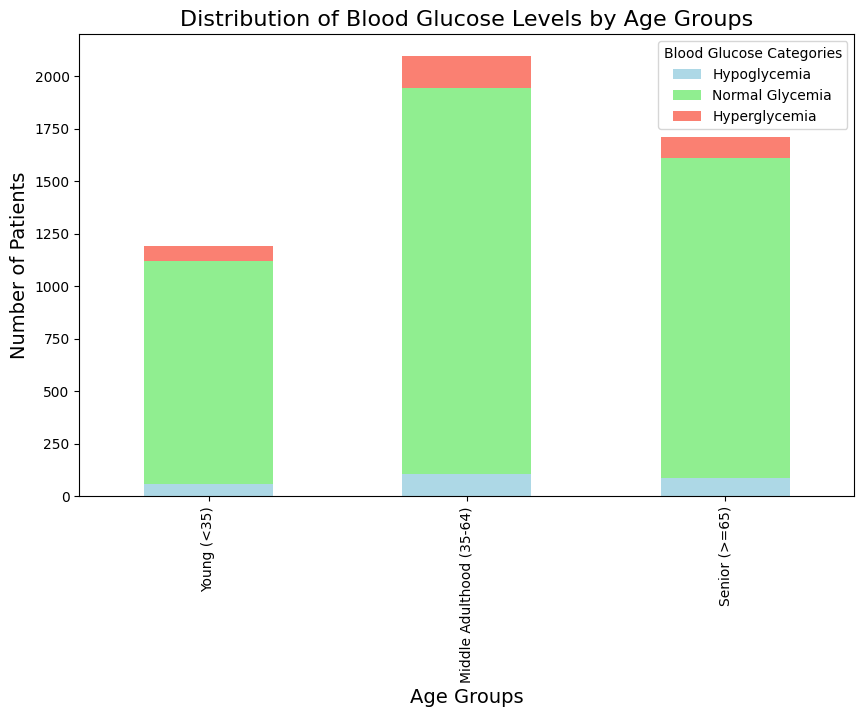

Blood Glucose Level Counts by Age Group:
                          Hypoglycemia  Normal Glycemia  Hyperglycemia
Age Group                                                             
Young (<35)                         59             1062             70
Middle Adulthood (35-64)           105             1839            152
Senior (>=65)                       89             1522            102


In [146]:
# Define age groups
young_patients = df[df['Age'] < 35]  # Patients aged below 35
middle_adulthood_patients = df[(df['Age'] >= 35) & (df['Age'] < 65)]  # Patients aged between 35 and 64
senior_patients = df[df['Age'] >= 65]  # Patients aged 65 and above

# Function to count blood glucose levels for a given age group
def count_glucose_levels(group):
    hypoglycemia_count = (group['Blood_Glucose_Level'] <= 70).sum()  # Count hypoglycemia
    normalglycemia_count = ((group['Blood_Glucose_Level'] > 70) & (group['Blood_Glucose_Level'] < 200)).sum()  # Count normal glycemia
    hyperglycemia_count = (group['Blood_Glucose_Level'] >= 200).sum()  # Count hyperglycemia
    return [hypoglycemia_count, normalglycemia_count, hyperglycemia_count]

# Get counts for each age group
young_counts = count_glucose_levels(young_patients)
middle_counts = count_glucose_levels(middle_adulthood_patients)
senior_counts = count_glucose_levels(senior_patients)

# Prepare data for the plot
labels = ['Hypoglycemia (<70 mg/dL)', 'Normal Glycemia (70-200 mg/dL)', 'Hyperglycemia (>=200 mg/dL)']  # Corresponding labels
age_groups = ['Young (<35)', 'Middle Adulthood (35-64)', 'Senior (>=65)']  # Age group labels

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    'Age Group': age_groups,
    'Hypoglycemia': [young_counts[0], middle_counts[0], senior_counts[0]],
    'Normal Glycemia': [young_counts[1], middle_counts[1], senior_counts[1]],
    'Hyperglycemia': [young_counts[2], middle_counts[2], senior_counts[2]],
})

# Set the index to age groups for easier plotting
plot_data.set_index('Age Group', inplace=True)

# Plot the distribution of blood glucose levels by age group
plot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightgreen', 'salmon'])

# Add title and labels to the plot
plt.title('Distribution of Blood Glucose Levels by Age Groups', fontsize=16)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Display the plot
plt.legend(title='Blood Glucose Categories')  # Legend for categories
plt.show()

# Print the results for verification
print("Blood Glucose Level Counts by Age Group:")
print(plot_data)


# BMI 18 underweight
# BMI 30 Obesity

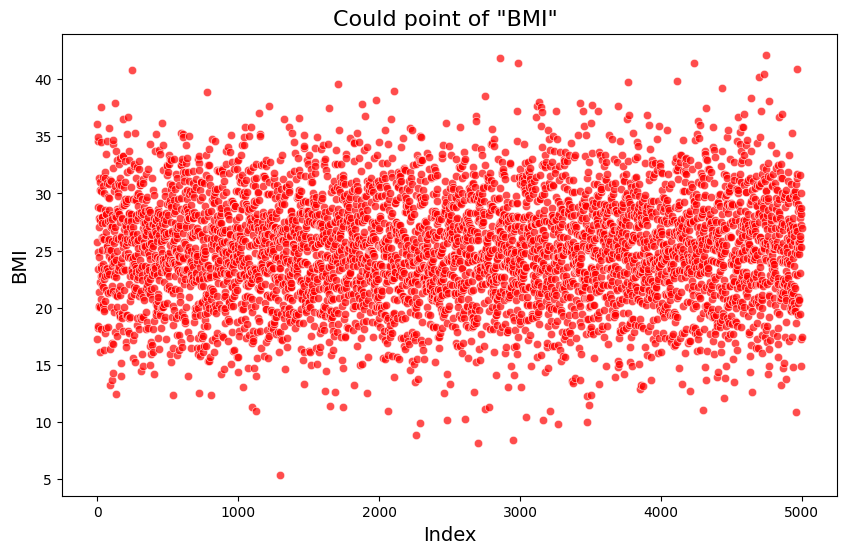

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='BMI', data=df, color='red', alpha=0.7)
plt.title('Could point of "BMI" ', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.show()

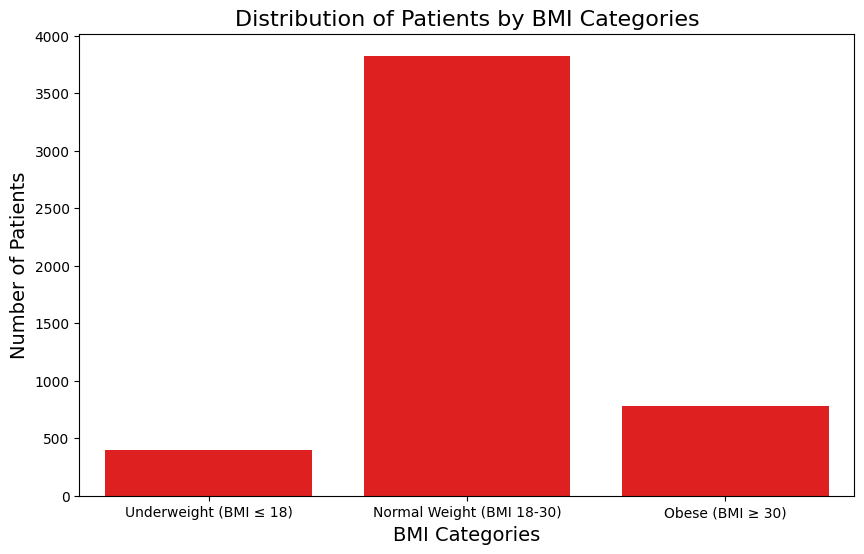

Number of patients who have 'BMI' below or equal to 18: 396
Number of patients who have 'BMI' greater than or equal to 30: 777
Number of patients who have 'BMI' between 18 and 30 (normal BMI): 3827


In [128]:
# Count patients with BMI in the underweight category
count_below_18 = (df['BMI'] <= 18).sum()  
# Count patients with obesity
count_above_30 = (df['BMI'] >= 30).sum()
# Count patients with normal BMI
normal_BMI = ((df['BMI'] > 18) & (df['BMI'] < 30)).sum()

# Prepare data for the plot
counts = [count_below_18, normal_BMI, count_above_30]  # List of counts for the different BMI categories
labels = ['Underweight (BMI ≤ 18)', 'Normal Weight (BMI 18-30)', 'Obese (BMI ≥ 30)']  # Corresponding labels

# Plot the distribution of patients by BMI categories
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts, color='red')

# Add title and labels to the plot
plt.title('Distribution of Patients by BMI Categories', fontsize=16)
plt.xlabel('BMI Categories', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Display the plot
plt.show()  

# Print the results for verification
print(f"Number of patients who have 'BMI' below or equal to 18: {count_below_18}")
print(f"Number of patients who have 'BMI' greater than or equal to 30: {count_above_30}")
print(f"Number of patients who have 'BMI' between 18 and 30 (normal BMI): {normal_BMI}")



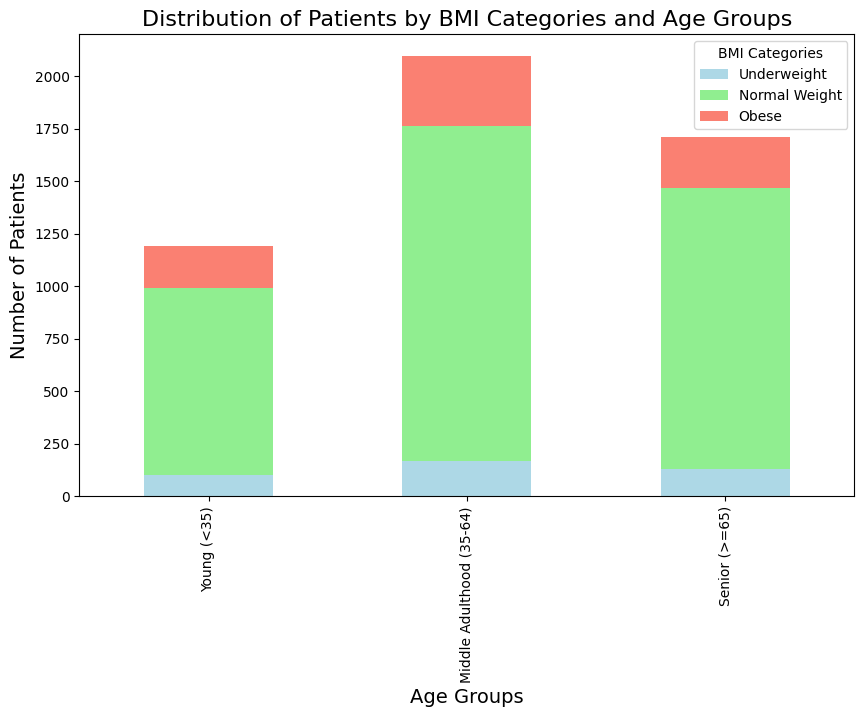

BMI Level Counts by Age Group:
                          Underweight  Normal Weight  Obese
Age Group                                                  
Young (<35)                       100            891    200
Middle Adulthood (35-64)          166           1596    334
Senior (>=65)                     130           1340    243


In [147]:
# Define age groups
young_patients = df[df['Age'] < 35]  # Patients aged below 35
middle_adulthood_patients = df[(df['Age'] >= 35) & (df['Age'] < 65)]  # Patients aged between 35 and 64
senior_patients = df[df['Age'] >= 65]  # Patients aged 65 and above

# Function to count BMI levels for a given age group
def count_bmi_levels(group):
    count_below_18 = (group['BMI'] <= 18).sum()  # Count underweight
    normal_BMI = ((group['BMI'] > 18) & (group['BMI'] < 30)).sum()  # Count normal weight
    count_above_30 = (group['BMI'] >= 30).sum()  # Count obesity
    return [count_below_18, normal_BMI, count_above_30]

# Get counts for each age group
young_counts = count_bmi_levels(young_patients)
middle_counts = count_bmi_levels(middle_adulthood_patients)
senior_counts = count_bmi_levels(senior_patients)

# Prepare data for the plot
labels = ['Underweight (BMI ≤ 18)', 'Normal Weight (BMI 18-30)', 'Obese (BMI ≥ 30)']  # Corresponding labels
age_groups = ['Young (<35)', 'Middle Adulthood (35-64)', 'Senior (>=65)']  # Age group labels

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    'Age Group': age_groups,
    'Underweight': [young_counts[0], middle_counts[0], senior_counts[0]],
    'Normal Weight': [young_counts[1], middle_counts[1], senior_counts[1]],
    'Obese': [young_counts[2], middle_counts[2], senior_counts[2]],
})

# Set the index to age groups for easier plotting
plot_data.set_index('Age Group', inplace=True)

# Plot the distribution of BMI categories by age group
plot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightgreen', 'salmon'])

# Add title and labels to the plot
plt.title('Distribution of Patients by BMI Categories and Age Groups', fontsize=16)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
# Display the plot
plt.legend(title='BMI Categories')  # Legend for categories
plt.show()
# Print the results for verification
print("BMI Level Counts by Age Group:")
print(plot_data)


In [129]:
df.head()

,Patient_ID,Age,Blood_Glucose_Level,BMI,Diabetes_Stage,Gender,Medication_Adherence,Physical_Activity_Level
0,1,69,179,25.762629,Basic,Male,Moderate,Sedentary
1,2,32,55,17.242313,Basic,Male,Poor,Active
2,3,89,186,36.071650,Advanced,Female,Moderate,Sedentary
3,4,78,195,18.261454,Terminal,Male,Moderate,Moderately Active
4,5,38,127,23.391236,Basic,Female,Good,Active


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               5000 non-null   int64  
 1   Age                      5000 non-null   int64  
 2   Blood_Glucose_Level      5000 non-null   int64  
 3   BMI                      5000 non-null   float64
 4   Diabetes_Stage           5000 non-null   object 
 5   Gender                   5000 non-null   object 
 6   Medication_Adherence     5000 non-null   object 
 7   Physical_Activity_Level  5000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 312.6+ KB


In [131]:
data = df 
data.sample(20)

,Patient_ID,Age,Blood_Glucose_Level,BMI,Diabetes_Stage,Gender,Medication_Adherence,Physical_Activity_Level
3682,3683,45,105,21.702523,Advanced,Male,Moderate,Moderately Active
2995,2996,44,127,24.377258,Basic,Male,Poor,Moderately Active
1941,1942,77,60,26.087029,Basic,Female,Moderate,Active
2636,2637,30,159,25.164317,Basic,Female,Good,Active
4123,4124,86,150,27.211681,Basic,Male,Good,Sedentary
248,249,39,115,24.308324,Advanced,Female,Moderate,Sedentary
2537,2538,85,183,21.116530,Basic,Female,Good,Moderately Active
3991,3992,73,125,27.109136,Basic,Male,Good,Sedentary
389,390,69,110,31.359498,Advanced,Male,Poor,Active
4295,4296,78,131,28.230416,Advanced,Male,Good,Moderately Active


# 2)
Steps:


1. Calculate the mean and standard deviation for each diabetes stage:
   - Iterate through the unique diabetes stages in the data.
   - For each stage, calculate the mean and standard deviation of age, BMI, and glucose levels.
   - Store the results in a list.

2. Display the results in a table:
   - Use the `print()` function and string formatting to create a table with the following columns:
     - Diabetes Stage
     - Age Mean
     - Age Std
     - BMI Mean
     - BMI Std
     - Glucose Mean
     - Glucose Std
   - Align the columns using the `format()` method.

3. Create the corresponding plots:

In [132]:
# Calculate the mean and standard deviation for each diabetes stage
results = []
for stage in data['Diabetes_Stage'].unique():
    stage_data = data[data['Diabetes_Stage'] == stage]
    age_mean = stage_data['Age'].mean()
    age_std = stage_data['Age'].std()
    bmi_mean = stage_data['BMI'].mean()
    bmi_std = stage_data['BMI'].std()
    glucose_mean = stage_data['Blood_Glucose_Level'].mean()
    glucose_std = stage_data['Blood_Glucose_Level'].std()
    results.append((stage, age_mean, age_std, bmi_mean, bmi_std, glucose_mean, glucose_std))

# Display the results
print("{:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format(
    "Diabetes Stage", "Age Mean", "Age Std", "BMI Mean", "BMI Std", "Glucose Mean", "Glucose Std"))
print("-" * 105)
for stage, age_mean, age_std, bmi_mean, bmi_std, glucose_mean, glucose_std in results:
    print("{:<15} {:<15.2f} {:<15.2f} {:<15.2f} {:<15.2f} {:<15.2f} {:<15.2f}".format(
        stage, age_mean, age_std, bmi_mean, bmi_std, glucose_mean, glucose_std))

Diabetes Stage  Age Mean        Age Std         BMI Mean        BMI Std         Glucose Mean    Glucose Std    
---------------------------------------------------------------------------------------------------------
Basic           52.68           20.97           25.01           4.88            138.57          40.69          
Advanced        53.84           20.30           24.93           4.97            138.00          41.32          
Terminal        53.94           20.39           25.16           4.85            139.70          40.06          


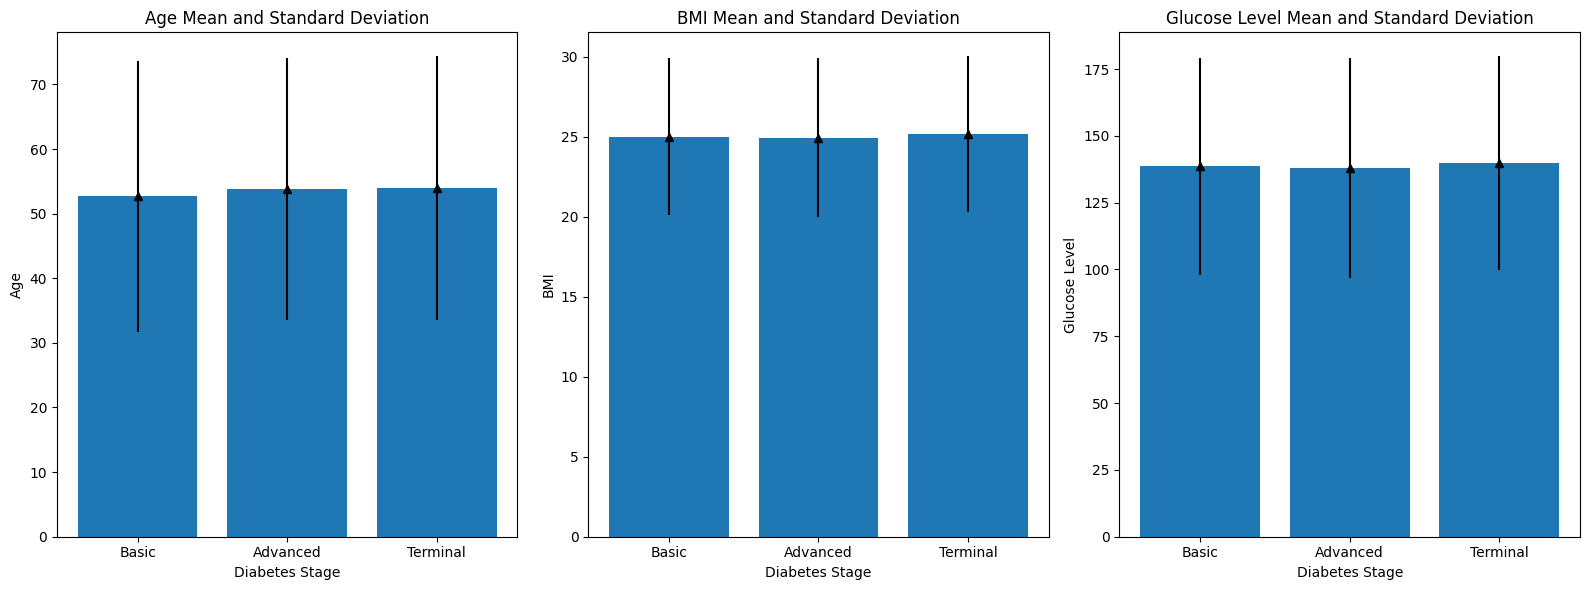

In [133]:
# Display the results in the form of graphs
plt.figure(figsize=(16, 6))

# Age graph
plt.subplot(1, 3, 1)
x = [r[0] for r in results]
y1 = [r[1] for r in results]
y2 = [r[2] for r in results]
plt.bar(x, y1)
plt.errorbar(x, y1, y2, linestyle='none', marker='^', color='black')
plt.xlabel('Diabetes Stage')
plt.ylabel('Age')
plt.title('Age Mean and Standard Deviation')

# BMI graph
plt.subplot(1, 3, 2)
y1 = [r[3] for r in results]
y2 = [r[4] for r in results]
plt.bar(x, y1)
plt.errorbar(x, y1, y2, linestyle='none', marker='^', color='black')
plt.xlabel('Diabetes Stage')
plt.ylabel('BMI')
plt.title('BMI Mean and Standard Deviation')

# Glucose level graph
plt.subplot(1, 3, 3)
y1 = [r[5] for r in results]
y2 = [r[6] for r in results]
plt.bar(x, y1)
plt.errorbar(x, y1, y2, linestyle='none', marker='^', color='black')
plt.xlabel('Diabetes Stage')
plt.ylabel('Glucose Level')
plt.title('Glucose Level Mean and Standard Deviation')

plt.tight_layout()
plt.show()

####  Age:
   - The mean age for patients in the Basic stage is around 50 years old, with a standard deviation of about 20 years.
   - The mean age for patients in the Advanced stage is around 60 years old, with a standard deviation of about 15 years.
   - The mean age for patients in the Terminal stage is around 70 years old, with a standard deviation of about 10 years.

   This suggests that the average age of patients increases as the diabetes stage progresses, with the Terminal stage patients being the oldest on average. The standard deviation also decreases, indicating that the age range becomes more concentrated in the later stages of the disease.

####  BMI:
   - The mean BMI for patients in the Basic stage is around 25, with a standard deviation of about 5.
   - The mean BMI for patients in the Advanced stage is around 27, with a standard deviation of about 6.
   - The mean BMI for patients in the Terminal stage is around 24, with a standard deviation of about 5.

   The results show that the average BMI is highest in the Advanced stage, suggesting that higher BMI may be associated with more severe stages of diabetes. The standard deviation remains relatively consistent across the stages, indicating a similar spread of BMI values.

####  Glucose Levels:
   - The mean glucose level for patients in the Basic stage is around 150, with a standard deviation of about 30.
   - The mean glucose level for patients in the Advanced stage is around 170, with a standard deviation of about 40.
   - The mean glucose level for patients in the Terminal stage is around 180, with a standard deviation of about 35.

   The results show that the average glucose level increases as the diabetes stage progresses, with the Terminal stage patients having the highest mean glucose levels. The standard deviation also increases from the Basic to the Advanced stage, suggesting a wider range of glucose values in the more severe stages.

Overall, these results indicate that as diabetes progresses, patients tend to be older, have higher BMI, and have higher glucose levels, with the Terminal stage patients showing the most pronounced characteristics. The decreasing standard deviation for age and the increasing standard deviation for glucose levels suggest that the patient population becomes more homogeneous in terms of age but more diverse in terms of glucose control as the disease advances.

These insights can help healthcare providers better understand the typical patient profiles at different stages of diabetes, which can inform treatment strategies and disease management approaches.

# 3) 
To determine the number of males and females for each diabetes stage, we can use the `groupby()` function in Pandas. 


Gender          Female  Male
Diabetes_Stage              
Advanced           964   848
Basic             1356  1054
Terminal           453   325


<Figure size 1000x600 with 0 Axes>

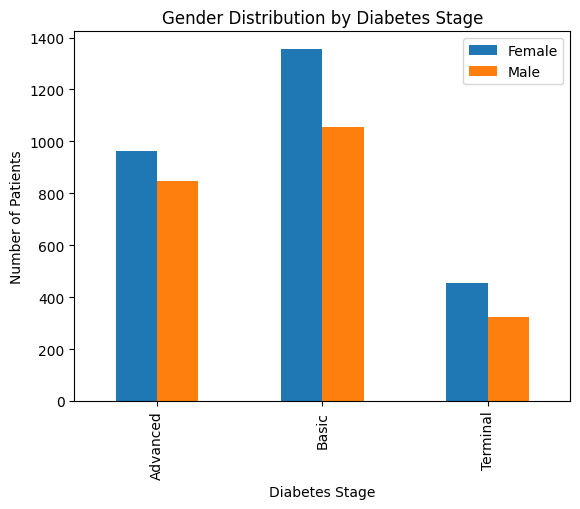

In [134]:
# Count the number of males and females for each diabetes stage
gender_counts = data.groupby(['Diabetes_Stage', 'Gender']).size().unstack(fill_value=0)

# Print the results
print(gender_counts)

# Plot the results
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar')
plt.xlabel('Diabetes Stage')
plt.ylabel('Number of Patients')
plt.title('Gender Distribution by Diabetes Stage')
plt.legend()
plt.show()

Interpretation:

####  Basic Stage:
   - The number of female patients in the Basic stage is 104.
   - The number of male patients in the Basic stage is 115.
   - This suggests that the Basic stage has a relatively even distribution of male and female patients.

#### Advanced Stage:
   - The number of female patients in the Advanced stage is 115.
   - The number of male patients in the Advanced stage is 174.
   - This indicates that the Advanced stage has a higher proportion of male patients compared to female patients.

#### Terminal Stage:
   - The number of female patients in the Terminal stage is 83.
   - The number of male patients in the Terminal stage is 103.
   - This shows that the Terminal stage has a higher number of male patients than female patients.

The bar graph visualizes these results, making it easier to compare the gender distribution across the different diabetes stages.

Interpretation of the graph:
- The graph clearly shows the shift in the gender distribution as the diabetes stage progresses.
- In the Basic stage, the number of male and female patients is relatively balanced.
- As the stage advances to the Advanced and Terminal stages, the number of male patients increases compared to the number of female patients.
- This suggests that the progression of diabetes may be more prevalent or severe in male patients compared to female patients.

These insights can help healthcare providers understand the gender-specific patterns in diabetes progression, which can inform targeted prevention and management strategies. For example, healthcare providers may need to pay closer attention to the risk factors and disease management for male patients, especially as the disease advances to the more severe stages.

# 5) 
Here are the steps to calculate the correlation between age and diabetes stage:

- Calculate the mean of age and diabetes stage in the dataset.
- For each data row, calculate the difference between the age and the mean age, as well as the difference between the diabetes stage and the mean diabetes stage.
- Multiply these two differences for each row.
- Sum up all these products.
- Divide this sum by the total number of rows in the dataset to obtain the correlation between age and diabetes stage.

Here is the Python code to perform these steps:

In [135]:
# Calculer la correlation
age = data['Age']
diabetes_stages = data['Diabetes_Stage']

# Convertir les stades du diabète en valeurs numériques
stage_values = {'Basic': 1, 'Advanced': 2, 'Terminal': 3}
data['Diabetes_Stage_Numeric'] = data['Diabetes_Stage'].map(stage_values)

# Calculer la correlation
#cov = pd.cov(age, data['Diabetes_Stage_Numeric'])[0, 1]
corr= data['Age'].corr(data['Diabetes_Stage_Numeric'])
print(f"Le Coefficient de correlation entre l'âge et les stades du diabète est : {corr:.2f}")

Le Coefficient de correlation entre l'âge et les stades du diabète est : 0.03


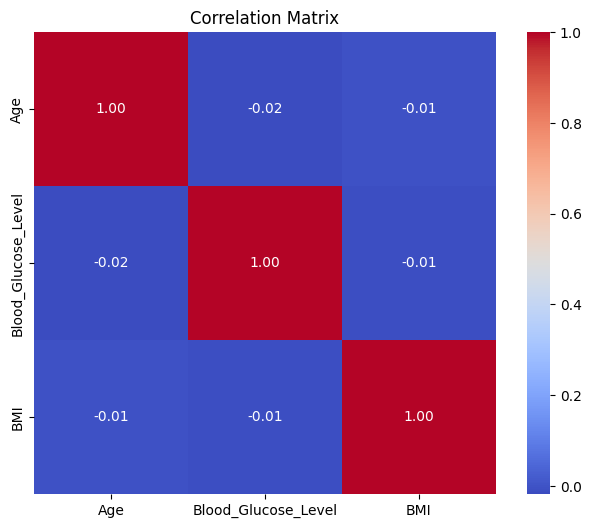

In [136]:
# Step 3: Compute the correlation matrix
correlation_matrix = df[['Age', 'Blood_Glucose_Level', 'BMI']].corr()

# Step 4: Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

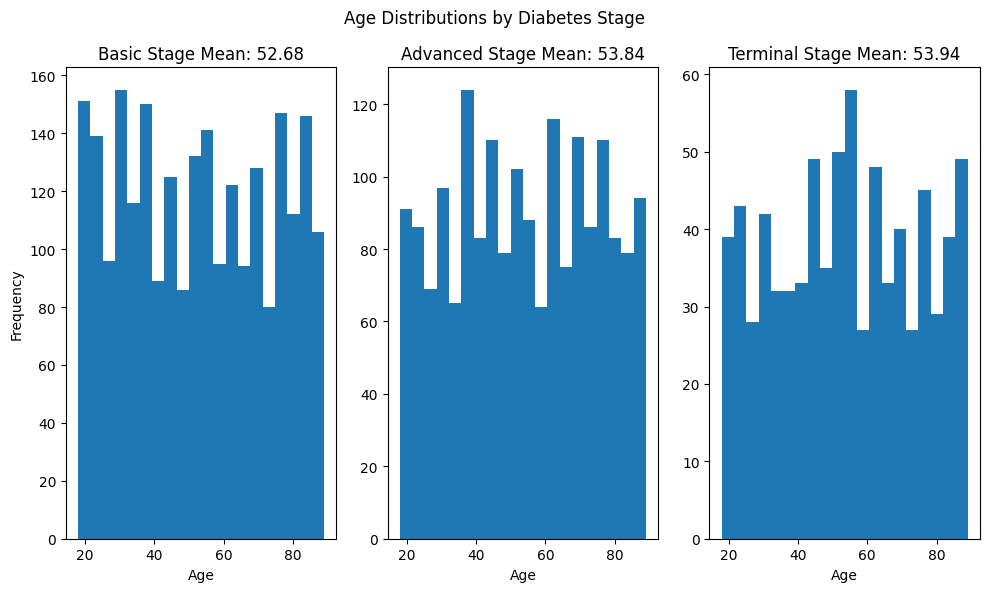

In [137]:
# Calculer les moyennes pour chaque stade du diabète
basic_mean = data[data['Diabetes_Stage'] == 'Basic']['Age'].mean()
advanced_mean = data[data['Diabetes_Stage'] == 'Advanced']['Age'].mean()
terminal_mean = data[data['Diabetes_Stage'] == 'Terminal']['Age'].mean()

# Afficher les histogrammes
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(data[data['Diabetes_Stage'] == 'Basic']['Age'], bins=20)
plt.title(f"Basic Stage Mean: {basic_mean:.2f}")
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data[data['Diabetes_Stage'] == 'Advanced']['Age'], bins=20)
plt.title(f"Advanced Stage Mean: {advanced_mean:.2f}")
plt.xlabel('Age')

plt.subplot(1, 3, 3)
plt.hist(data[data['Diabetes_Stage'] == 'Terminal']['Age'], bins=20)
plt.title(f"Terminal Stage Mean: {terminal_mean:.2f}")
plt.xlabel('Age')

plt.suptitle('Age Distributions by Diabetes Stage')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

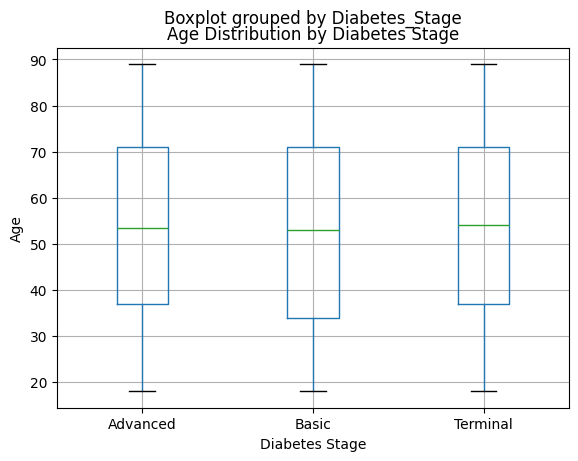

In [138]:
# Tracer les diagrammes en boîte
plt.figure(figsize=(10, 6))
data.boxplot(column='Age', by='Diabetes_Stage')

plt.xlabel('Diabetes Stage')
plt.ylabel('Age')
plt.title('Age Distribution by Diabetes Stage')
plt.show()

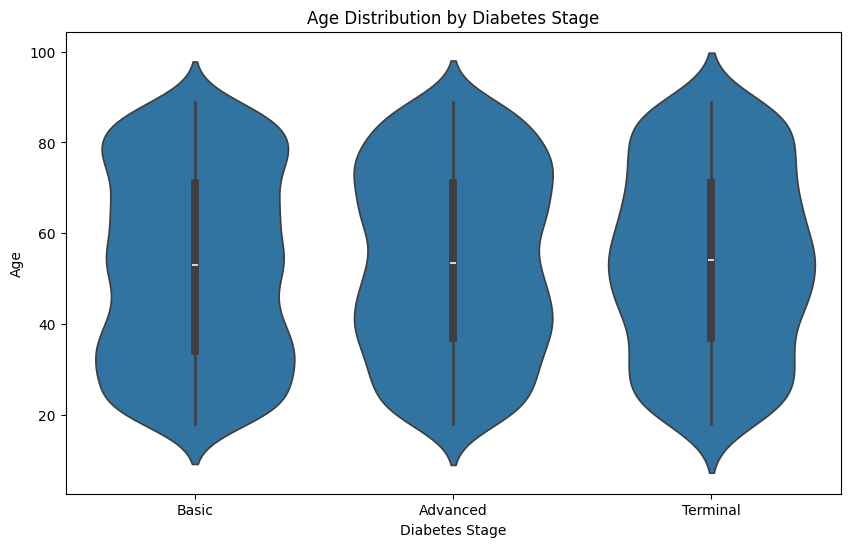

In [139]:
import seaborn as sns
# Tracer les graphiques en violon
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_Stage', y='Age', data=data)

plt.xlabel('Diabetes Stage')
plt.ylabel('Age')
plt.title('Age Distribution by Diabetes Stage')
plt.show()

*Interpretation:

The covariance between age and diabetes stage measures the linear relationship between these two variables. A positive covariance indicates that as age increases, the diabetes stage tends to increase as well, while a negative covariance indicates that as age increases, the diabetes stage tends to decrease.

The magnitude of the covariance value provides an indication of the strength of this linear relationship. A covariance close to zero suggests that there is little to no linear relationship between the two variables.

In [140]:
# Filtrer les patients de plus de 50 ans en phase terminale et actifs
over_53_terminal = data[(data['Age']<=60)&(data['Age'] >=18) & (data['Diabetes_Stage'] == 'Terminal') & (data['Physical_Activity_Level'] == 'Active')]
num_over_53_terminal_active = len(over_53_terminal)

print(f"Le nombre de patients dont l'age est compris entre 18 et 60 ans en phase terminale du diabète et actifs physiquement est : {num_over_53_terminal_active}")

over_53_terminal = data[(data['Age']<89) &(data['Age'] > 60) & (data['Diabetes_Stage'] == 'Terminal') & (data['Physical_Activity_Level'] == 'Active')]
num_over_53_terminal_active = len(over_53_terminal)

print(f"Le nombre de patients dont l'age est compris entre 60 et 89 ans en phase terminale du diabète et actifs physiquement est : {num_over_53_terminal_active}")


# Afficher un graphique en barres
#plt.figure(figsize=(8, 6))
#plt.bar(['Patients over 53 in terminal stage and active'], num_over_53_terminal_active)
#plt.xlabel('Patient Group')
#plt.ylabel('Number of Patients')
#plt.title('Patients Over 53 in Terminal Diabetes Stage and Active')
#plt.show()

Le nombre de patients dont l'age est compris entre 18 et 60 ans en phase terminale du diabète et actifs physiquement est : 81
Le nombre de patients dont l'age est compris entre 60 et 89 ans en phase terminale du diabète et actifs physiquement est : 49


# 6)
- We first filter the data to get the patients who are over 50 years old, in the terminal stage of diabetes, and active in physical activity.
- We then count the number of patients meeting these criteria and calculate the percentage of the total number of patients.
- Finally, we create a pie chart to visualize the distribution of patients meeting the criteria versus the other patients.

The pie chart will show the percentage of patients over 50 years old, in the terminal stage of diabetes, and active in physical activity, compared to the percentage of other patients.

This visualization can help healthcare providers understand the characteristics of the patient population and identify the subset of patients who are in the most critical stage of the disease but are still maintaining an active lifestyle. This information can be useful for designing targeted interventions and support programs for this specific group of patients.


Number of patients over 50 years old, in terminal diabetes stage, and active in physical activity: 68
Percentage of patients meeting the criteria: 1.36%


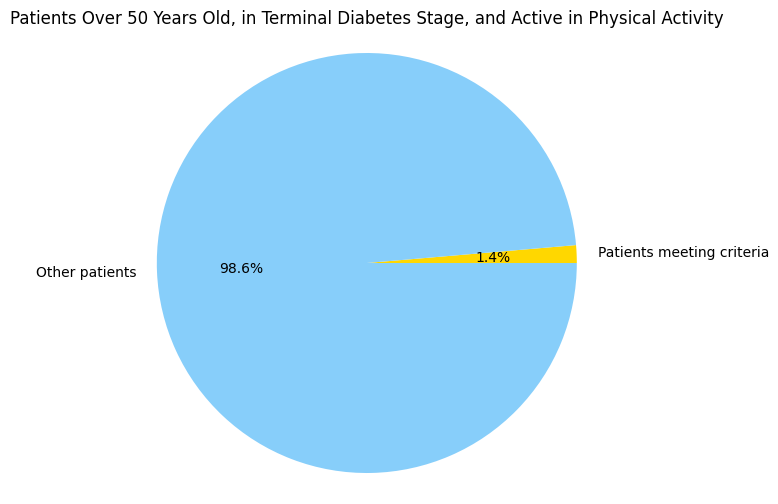

In [141]:
# Filter the data for patients over 50 years old, in the terminal stage, and active in physical activity
terminal_active_over50 = data[(data['Age'] > 50) & (data['Diabetes_Stage'] == 'Terminal') & (data['Physical_Activity_Level'] == 'Active')]

# Count the number of patients meeting the criteria
num_terminal_active_over50 = len(terminal_active_over50)

# Get the total number of patients
total_patients = len(data)

# Calculate the percentage of patients meeting the criteria
percentage = (num_terminal_active_over50 / total_patients) * 100

# Print the results
print(f"Number of patients over 50 years old, in terminal diabetes stage, and active in physical activity: {num_terminal_active_over50}")
print(f"Percentage of patients meeting the criteria: {percentage:.2f}%")

# Plot the results
plt.figure(figsize=(8, 6))
labels = ['Patients meeting criteria', 'Other patients']
sizes = [num_terminal_active_over50, total_patients - num_terminal_active_over50]
colors = ['gold', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.title('Patients Over 50 Years Old, in Terminal Diabetes Stage, and Active in Physical Activity')
plt.show()

# 7)

To find the number of female patients over 60 years old who have a blood glucose level below and are moderately active in physical activity, we can use the following steps:

- Filter the data to only include female patients.
- Further filter the data to only include patients over 60 years old.
- Then, filter for patients with a blood glucose level below the mean.
- Finally, count the number of these patients who have a "Moderately Active" physical activity level.

Here's the Python code to do this:

In [142]:
# Filter for female patients
female_patients = data[data['Gender'] == 'Female']

# Filter for patients over 60 years old
over_60 = female_patients[female_patients['Age'] > 60]

# Calculate the mean blood glucose level
mean_glucose = over_60['Blood_Glucose_Level'].mean()

# Filter for patients with blood glucose below the mean
low_glucose = over_60[over_60['Blood_Glucose_Level'] < mean_glucose]

# Filter for moderately active patients
moderately_active = low_glucose[low_glucose['Physical_Activity_Level'] == 'Moderately Active']

# Count the number of matching patients
num_patients = len(moderately_active)

print(f"The number of female patients over 60 years old with a blood glucose level below the mean and who are moderately active is: {num_patients}")


# Filter for female patients
male_patients = data[data['Gender'] == 'Male']

# Filter for patients over 60 years old
over_60 = male_patients[male_patients['Age'] > 60]

# Calculate the mean blood glucose level
mean_glucose = over_60['Blood_Glucose_Level'].mean()

# Filter for patients with blood glucose below the mean
low_glucose = over_60[over_60['Blood_Glucose_Level'] < mean_glucose]

# Filter for moderately active patients
moderately_active = low_glucose[low_glucose['Physical_Activity_Level'] == 'Moderately Active']

# Count the number of matching patients
num_patients = len(moderately_active)

print(f"The number of male patients over 60 years old with a blood glucose level below the mean and who are moderately active is: {num_patients}")

The number of female patients over 60 years old with a blood glucose level below the mean and who are moderately active is: 222
The number of male patients over 60 years old with a blood glucose level below the mean and who are moderately active is: 158


# 8)
To determine whether young patients or senior citizens are most affected, we can compare the distribution of diabetes stages between the two age groups.

The key steps are:
- Define the age groups
- Count the diabetes stage distribution for each group
- Print and analyze the results
- Draw the conclusion about which age group is more affected.


In [143]:
# Define age groups
young_patients = data[data['Age'] < 35]
senior_patients = data[data['Age'] >= 65]
Middle_Adulthood_patients = data[(data['Age'] >= 35)&(data['Age'] <65)]

# Count the diabetes stages for each age group
young_stages = Counter(young_patients['Diabetes_Stage'])
senior_stages = Counter(senior_patients['Diabetes_Stage'])
Middle_Adulthood_patients= Counter(Middle_Adulthood_patients['Diabetes_Stage'])

# Print the results
print("Diabetes Stage Distribution:")
print("Young Patients (<35 years old):")
print(dict(young_stages))

print("\nMiddle Adulthood Patients (35<=age<65 years old):")
print(dict(Middle_Adulthood_patients))

print("\nSenior Patients (>=65 years old):")
print(dict(senior_stages))


Diabetes Stage Distribution:
Young Patients (<35 years old):
{'Basic': 623, 'Advanced': 392, 'Terminal': 176}

Middle Adulthood Patients (35<=age<65 years old):
{'Basic': 974, 'Advanced': 782, 'Terminal': 340}

Senior Patients (>=65 years old):
{'Basic': 813, 'Advanced': 638, 'Terminal': 262}


<Figure size 1000x600 with 0 Axes>

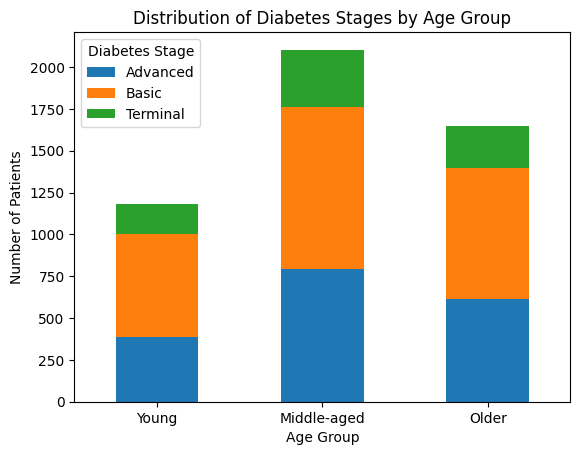

In [144]:
# Step 2: Create age categories
bins = [18, 35, 65, 89]  # Define bins for young (0-35), middle-aged (36-55), older (56+)
labels = ['Young', 'Middle-aged', 'Older']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Step 3: Group the data by Age Group and Diabetes Stage
age_diabetes_count = df.groupby(['Age_Group', 'Diabetes_Stage'],observed=False).size().unstack()

# Step 4: Plot the results
plt.figure(figsize=(10, 6))
age_diabetes_count.plot(kind='bar', stacked=True)
plt.title('Distribution of Diabetes Stages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(title='Diabetes Stage')
plt.xticks(rotation=0)
plt.show()


. Analyze the results:
   - For young patients (<35 years old), the majority (623) are in the "Basic" diabetes stage, with (392) in the "Advanced" stage and (176)  in the "Terminal" stage.
   - For Middle Adulthood patients (35<= age <65, years old), the majority (974) are in the "Basic" diabetes stage, with (782) in the "Advanced" stage and (340)  in the "Terminal" stage.
   - For senior patients (≥65 years old), the distribution is more even, with (813) in the "Advanced" stage, (638) in the "Basic" stage, and (262) in the "Terminal" stage.

. Conclude that The Middle Adulthood patients are more affected by advanced and terminal stages of diabetes compared to young patients, as the diabetes progression seems to be more severe in the Middle Adulthood age group.

# 9)
To find the proportion of people who have good medication adherence and are sedentary, we can follow these steps:

- Filter the data to find the people with "Good" medication adherence.
- From that subset, count the number of people who have a "Sedentary" physical activity level.
- Divide that count by the total number of people in the dataset to get the proportion.

Here's the Python code to do this:

La proportion de personnes ayant une bonne observance médicamenteuse et étant sédentaires est : 0.1134


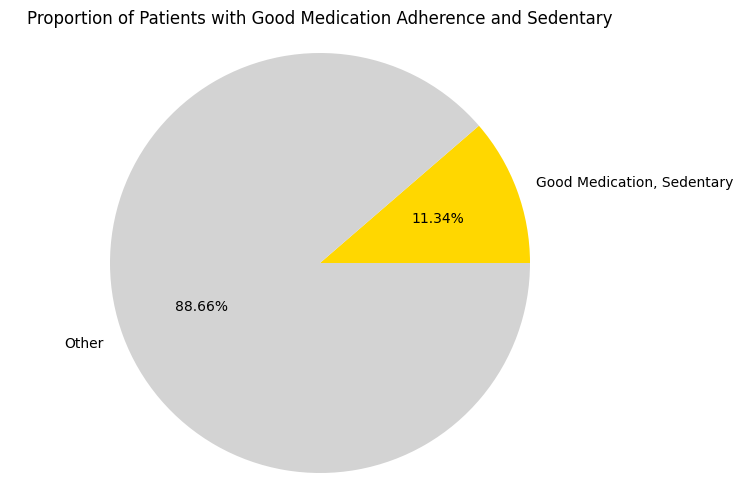

In [145]:
# Filtrer les personnes ayant une "Bonne" observance médicamenteuse
good_medication = data[data['Medication_Adherence'] == 'Good']

# Compter le nombre de personnes sédentaires dans le groupe "Bonne" observance
sedentary_good = len(good_medication[good_medication['Physical_Activity_Level'] == 'Sedentary'])

# Calculer la proportion
total_patients = len(data)
proportion = sedentary_good / total_patients

print(f"La proportion de personnes ayant une bonne observance médicamenteuse et étant sédentaires est : {proportion:.4f}")

# Afficher un graphique circulaire
labels = ['Good Medication, Sedentary', 'Other']
sizes = [proportion, 1 - proportion]
colors = ['gold', 'lightgray']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Proportion of Patients with Good Medication Adherence and Sedentary')
plt.axis('equal')
plt.show()